In [40]:
import  pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold


# Read the CSV and Perform Basic Data Cleaning

In [41]:
df = pd.read_csv("data/exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


# Select your features (columns)

In [ ]:
df.describe()

<AxesSubplot:>

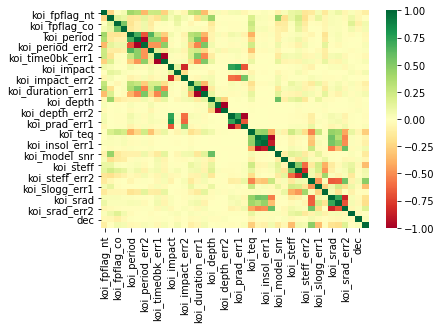

In [29]:
sns.heatmap(df.corr(), cmap='RdYlGn')

In [36]:
selected_features = df[["koi_period","koi_period_err1","koi_period_err2","koi_time0bk","koi_time0bk_err1",
                     "koi_steff_err2","koi_slogg","koi_slogg_err1","koi_slogg_err2","koi_srad",
                     "koi_srad_err1","koi_srad_err2","ra","dec","koi_kepmag"]]

In [37]:
selected_features.corr()

,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
koi_period,1.000000,0.674842,-0.674842,0.655186,0.272529,-0.036036,-0.055410,-0.006147,-0.168086,0.017590,0.041289,-0.008776,-0.030675,0.011226,-0.045959
koi_period_err1,0.674842,1.000000,-1.000000,0.469613,0.472034,-0.055134,-0.014447,0.005737,-0.140277,0.015100,0.033152,-0.008890,-0.005353,0.007145,-0.034097
koi_period_err2,-0.674842,-1.000000,1.000000,-0.469613,-0.472034,0.055134,0.014447,-0.005737,0.140277,-0.015100,-0.033152,0.008890,0.005353,-0.007145,0.034097
koi_time0bk,0.655186,0.469613,-0.469613,1.000000,0.162845,-0.030101,-0.001929,-0.031890,-0.107467,-0.004831,0.006444,0.011434,-0.016981,0.010483,0.021898
koi_time0bk_err1,0.272529,0.472034,-0.472034,0.162845,1.000000,-0.056111,-0.046285,0.035131,-0.116730,0.047142,0.068065,-0.042652,-0.003804,-0.009188,-0.041119
koi_steff_err2,-0.036036,-0.055134,0.055134,-0.030101,-0.056111,1.000000,0.064437,-0.152302,0.406832,0.023374,-0.054865,0.025996,-0.133620,0.015411,0.057210
koi_slogg,-0.055410,-0.014447,0.014447,-0.001929,-0.046285,0.064437,1.000000,-0.475257,0.023782,-0.650854,-0.635135,0.560525,-0.077364,0.059115,0.479006
koi_slogg_err1,-0.006147,0.005737,-0.005737,-0.031890,0.035131,-0.152302,-0.475257,1.000000,-0.240160,0.080111,0.217340,-0.191198,0.088301,-0.035741,-0.333466
koi_slogg_err2,-0.168086,-0.140277,0.140277,-0.107467,-0.116730,0.406832,0.023782,-0.240160,1.000000,0.050439,-0.166476,0.000039,-0.081768,-0.011361,-0.019689
koi_srad,0.017590,0.015100,-0.015100,-0.004831,0.047142,0.023374,-0.650854,0.080111,0.050439,1.000000,0.726436,-0.844701,0.040415,-0.033598,-0.175329


<AxesSubplot:>

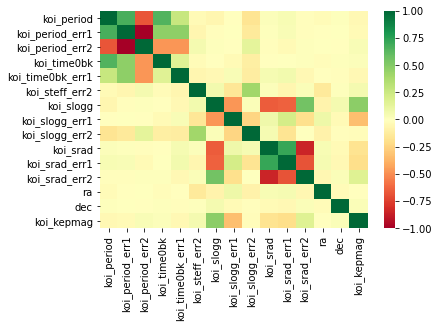

In [39]:
sns.heatmap(selected_features.corr(), cmap='RdYlGn')

In [ ]:
# Check for null values
df.info()

In [ ]:
df.shape

In [ ]:
df.isnull().sum()

C:\Users\Michelle H\anaconda3\envs\PythonAdv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='koi_disposition', ylabel='count'>

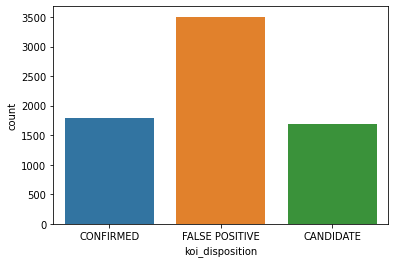

In [25]:
sns.countplot(df['koi_disposition'])

In [ ]:
# Set features. This will also be used as your x values.


# Create a Train Test Split

Use `koi_disposition` for the y values

In [3]:
X = df.drop("koi_disposition", axis=1)
y = df["koi_disposition"]
print("Shape: ", X.shape, y.shape)

Shape:  (6991, 40) (6991,)


In [4]:

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [ ]:
X_train.head()

# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [5]:
# scale the data
X_scaler = MinMaxScaler().fit(X_train)


In [6]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


# Train the Model



In [7]:
# loop through different k values to see which has the highest accuracy using odd numbers to ensure no ties
train_scores = []
test_scores = []

for k in range(1, 50, 2):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train_scaled, y_train)
    train_score = model.score(X_train_scaled, y_train)
    test_score = model.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")

k: 1, Train/Test Score: 1.000/0.796
k: 3, Train/Test Score: 0.896/0.810
k: 5, Train/Test Score: 0.873/0.825
k: 7, Train/Test Score: 0.869/0.819
k: 9, Train/Test Score: 0.857/0.820
k: 11, Train/Test Score: 0.850/0.820
k: 13, Train/Test Score: 0.849/0.817
k: 15, Train/Test Score: 0.846/0.817
k: 17, Train/Test Score: 0.842/0.814
k: 19, Train/Test Score: 0.838/0.816
k: 21, Train/Test Score: 0.837/0.818
k: 23, Train/Test Score: 0.834/0.815
k: 25, Train/Test Score: 0.833/0.812
k: 27, Train/Test Score: 0.831/0.811
k: 29, Train/Test Score: 0.830/0.813
k: 31, Train/Test Score: 0.829/0.815
k: 33, Train/Test Score: 0.829/0.819
k: 35, Train/Test Score: 0.829/0.818
k: 37, Train/Test Score: 0.829/0.815
k: 39, Train/Test Score: 0.830/0.814
k: 41, Train/Test Score: 0.830/0.814
k: 43, Train/Test Score: 0.829/0.810
k: 45, Train/Test Score: 0.830/0.812
k: 47, Train/Test Score: 0.829/0.814
k: 49, Train/Test Score: 0.830/0.816


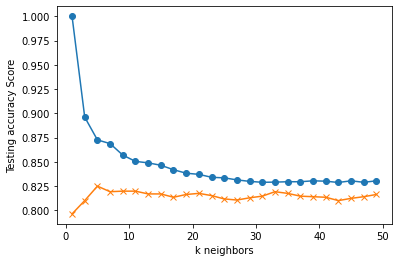

In [8]:
# plot data    
plt.plot(range(1, 50, 2), train_scores, marker='o')
plt.plot(range(1, 50, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [18]:
# Note that k: 9 provides the best accuracy where the classifier starts to stablize
model = KNeighborsClassifier(n_neighbors=33)
model.fit(X_train_scaled, y_train)
print(f"Training Data Score: {model.score(X_train_scaled, y_train):.4f}")
print(f"Testing Data Score: {model.score(X_test_scaled, y_test):.4f}")


Training Data Score: 0.8291
Testing Data Score: 0.8192


In [10]:
# predict test data set
y_pred = model.predict(X_test_scaled)


In [12]:
# check performance of model with classification report
print(classification_report(y_test, y_pred))

                precision    recall  f1-score   support

     CANDIDATE       0.72      0.47      0.57       422
     CONFIRMED       0.62      0.80      0.70       450
FALSE POSITIVE       0.98      1.00      0.99       876

      accuracy                           0.82      1748
     macro avg       0.77      0.76      0.75      1748
  weighted avg       0.82      0.82      0.81      1748



# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [17]:
# example of grid searching key hyperparametres for KNeighborsClassifier
n_range = []

for i in range(1,50,2):
    n_range.append(i)

# define grid search
param_grid = {'n_neighbors': n_range, 
              'weights': ['uniform', 'distance'], 
              'metric': ['euclidean', 'manhattan', 'minkowski']}


{'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan', 'minkowski']}


In [19]:
grid = GridSearchCV(model, param_grid, n_jobs = -1, verbose = 3)


In [20]:
# Train the model with GridSearch
grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   21.4s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   43.6s
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:  1.9min finished


GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=33), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                         23, 25, 27, 29, 31, 33, 35, 37, 39, 41,
                                         43, 45, 47, 49],
                         'weights': ['uniform', 'distance']},
             verbose=3)

In [21]:
print(grid.best_params_)
print(grid.best_score_)

{'metric': 'manhattan', 'n_neighbors': 37, 'weights': 'distance'}
0.8407359972056266


In [22]:
# Make predictions with the hypertuned model
predictions = grid.predict(X_test_scaled)

In [23]:
# check performance of model with classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

                precision    recall  f1-score   support

     CANDIDATE       0.77      0.50      0.61       422
     CONFIRMED       0.64      0.84      0.73       450
FALSE POSITIVE       0.98      1.00      0.99       876

      accuracy                           0.84      1748
     macro avg       0.80      0.78      0.77      1748
  weighted avg       0.84      0.84      0.83      1748



In [24]:
print(f"Training Data Score: {grid.score(X_train_scaled, y_train):.4f}")
print(f"Testing Data Score: {grid.score(X_test_scaled, y_test):.4f}")

Training Data Score: 1.0000
Testing Data Score: 0.8352


# Save the Model

In [ ]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'your_name.sav'
joblib.dump(your_model, filename)